In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter

In [2]:
filelocation = '../uas_ml/dataset/dataset_hijab.xlsx'
df_jual = pd.read_excel(filelocation, sheet_name='laporan penjualan', skiprows=3)

In [3]:
df_jual = df_jual.rename(columns={
    'NO': 'NO',
    'TANGGAL': 'TANGGAL',
    'KODE': 'KODE',
    'NAMA BARANG': 'NAMA BARANG',
    'KATEGORI': 'KATEGORI',
    'DESAIN': 'DESAIN',
    'HARGA JUAL': 'HARGA JUAL',
    'HARGA BELI': 'HARGA BELI',
    'LABA': 'LABA'
})

In [4]:
df_jual = df_jual.dropna(subset=['NO'])

In [5]:
df_jual['TANGGAL'] = pd.to_datetime(df_jual['TANGGAL'])
df_jual['BULAN'] = df_jual['TANGGAL'].dt.month

In [6]:
df_laris = df_jual.groupby(['KODE', 'NAMA BARANG']).size().reset_index(name='COUNT')
df_laris = df_laris.sort_values(by='COUNT', ascending=False)

In [7]:
top_10_laris = df_laris.head(10)
print("Top 10 Barang Terlaris:")
print(top_10_laris)


Top 10 Barang Terlaris:
    KODE          NAMA BARANG  COUNT
35  H-30     SEGITIGA DIAMOND     46
0   A-01               PENITI     37
1   A-02               CHIPUT     37
24  H-18    BERGO INSTAN VOAL     36
7   H-01         PASMINA OVAL     32
27  H-21       SEGIEMPAT VOAL     27
17  H-11        PASMINA VOAL      22
32  H-27        SEGITIGA VOAL     15
15  H-09  PASMINA SNOWCHIFFON     14
25  H-19   BERGO INSTAN CREPE     13


In [8]:
print("\nDeskripsi Data:")
print(df_jual.describe())


Deskripsi Data:
               NO                        TANGGAL     HARGA JUAL  \
count  469.000000                            469     469.000000   
mean   235.000000  2024-02-08 06:36:04.605543680   61731.343284   
min      1.000000            2024-02-01 00:00:00    4000.000000   
25%    118.000000            2024-02-04 00:00:00   30000.000000   
50%    235.000000            2024-02-08 00:00:00   60000.000000   
75%    352.000000            2024-02-12 00:00:00   80000.000000   
max    469.000000            2024-02-16 00:00:00  130000.000000   
std    135.532899                            NaN   37209.563300   

          HARGA BELI          LABA  BULAN  
count     469.000000    469.000000  469.0  
mean    76503.198294  14771.855011    2.0  
min      5000.000000   1000.000000    2.0  
25%     40000.000000  10000.000000    2.0  
50%     80000.000000  15000.000000    2.0  
75%    100000.000000  20000.000000    2.0  
max    150000.000000  20000.000000    2.0  
std     41617.028001   5603

In [9]:
print("\nInformasi Data:")
print(df_jual.info())


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 1 to 469
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   NO           469 non-null    float64       
 1   TANGGAL      469 non-null    datetime64[ns]
 2   KODE         469 non-null    object        
 3   NAMA BARANG  469 non-null    object        
 4   KATEGORI     469 non-null    object        
 5   DESAIN       469 non-null    object        
 6   HARGA JUAL   469 non-null    float64       
 7   HARGA BELI   469 non-null    float64       
 8   LABA         469 non-null    float64       
 9   BULAN        469 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1), object(4)
memory usage: 38.5+ KB
None



Distribusi Penjualan per Bulan:


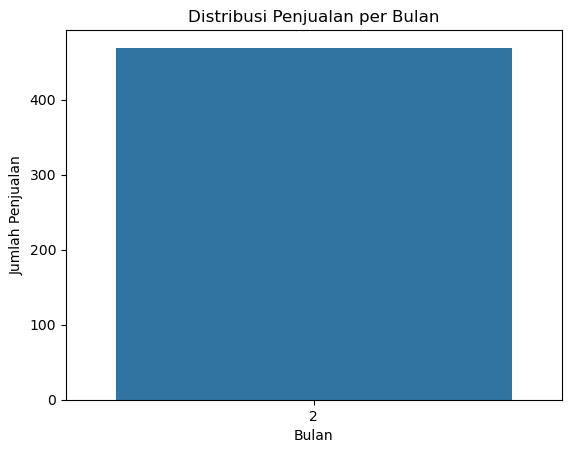

In [10]:
print("\nDistribusi Penjualan per Bulan:")
sns.countplot(x='BULAN', data=df_jual)
plt.title('Distribusi Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.show()

In [11]:
label_encoder = LabelEncoder()
df_jual['KODE'] = label_encoder.fit_transform(df_jual['KODE'])

In [12]:
X = df_jual[['KODE', 'BULAN']]

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

In [15]:
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'Optimal number of clusters: {optimal_clusters}')

Optimal number of clusters: 10


In [16]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [17]:
df_jual['CLUSTER'] = kmeans.labels_


In [18]:
next_month = 8
df_next_month = df_jual[['KODE']].drop_duplicates()
df_next_month['BULAN'] = next_month

In [19]:
X_next_month = scaler.transform(df_next_month[['KODE', 'BULAN']])
df_next_month['CLUSTER'] = kmeans.predict(X_next_month)

In [20]:
cluster_predictions = []
for cluster in range(optimal_clusters):
    items_in_cluster = df_jual[df_jual['CLUSTER'] == cluster]['NAMA BARANG']
    most_common_item = Counter(items_in_cluster).most_common(1)[0][0]
    cluster_predictions.append(most_common_item)

In [21]:
df_next_month['PREDIKSI'] = df_next_month['CLUSTER'].apply(lambda x: cluster_predictions[x])

In [22]:
print("\nPrediksi Barang Terlaris Bulan Depan:")
print(df_next_month)


Prediksi Barang Terlaris Bulan Depan:
     KODE  BULAN  CLUSTER              PREDIKSI
1       7      8        4          PASMINA OVAL
2      30      8        8         SEGITIGA VOAL
3      27      8        6        SEGIEMPAT VOAL
4      11      8        1  PASMINA SHIMMER SILK
5      10      8        1  PASMINA SHIMMER SILK
6      20      8        7  BERGO INSTAN CRINKLE
8      34      8        0      SEGITIGA DIAMOND
10     36      8        0      SEGITIGA DIAMOND
11     17      8        5         PASMINA VOAL 
12     35      8        0      SEGITIGA DIAMOND
17      0      8        2                PENITI
18      1      8        2                PENITI
19     25      8        3     BERGO INSTAN VOAL
24      3      8        9             SCRUNCHIE
29     24      8        3     BERGO INSTAN VOAL
31      5      8        9             SCRUNCHIE
33     15      8        5         PASMINA VOAL 
34      8      8        4          PASMINA OVAL
36     28      8        6        SEGIEMPAT VOAL
6

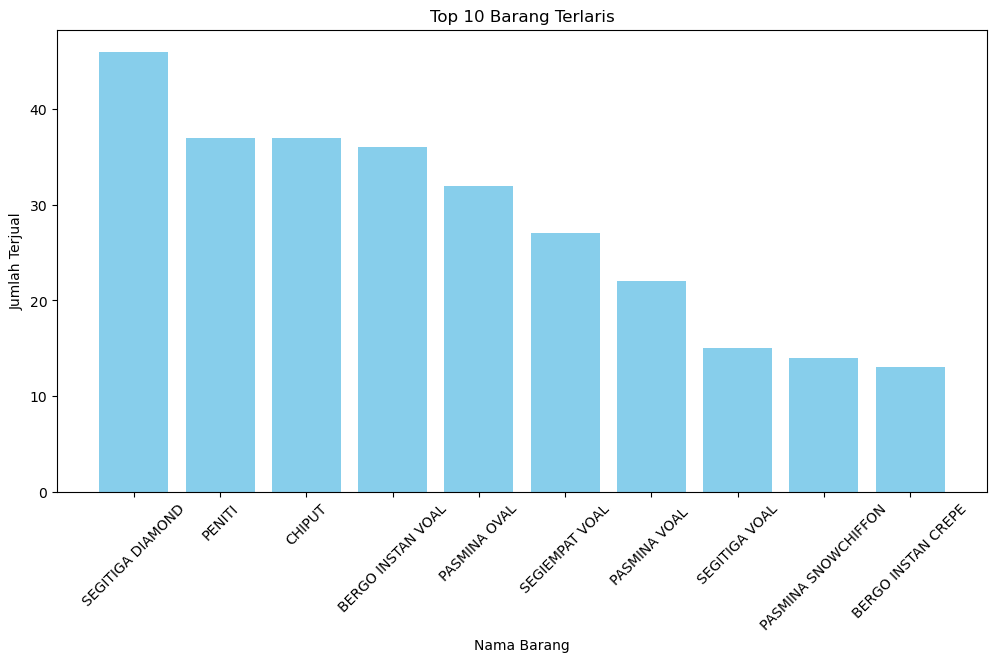

In [23]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_laris['NAMA BARANG'], top_10_laris['COUNT'], color='skyblue')
plt.xlabel('Nama Barang')
plt.ylabel('Jumlah Terjual')
plt.title('Top 10 Barang Terlaris')
plt.xticks(rotation=45)
plt.show()

In [24]:
pred_top_items = df_next_month.groupby('PREDIKSI').size().reset_index(name='COUNT')
pred_top_items = pred_top_items.sort_values(by='COUNT', ascending=False).head(10)

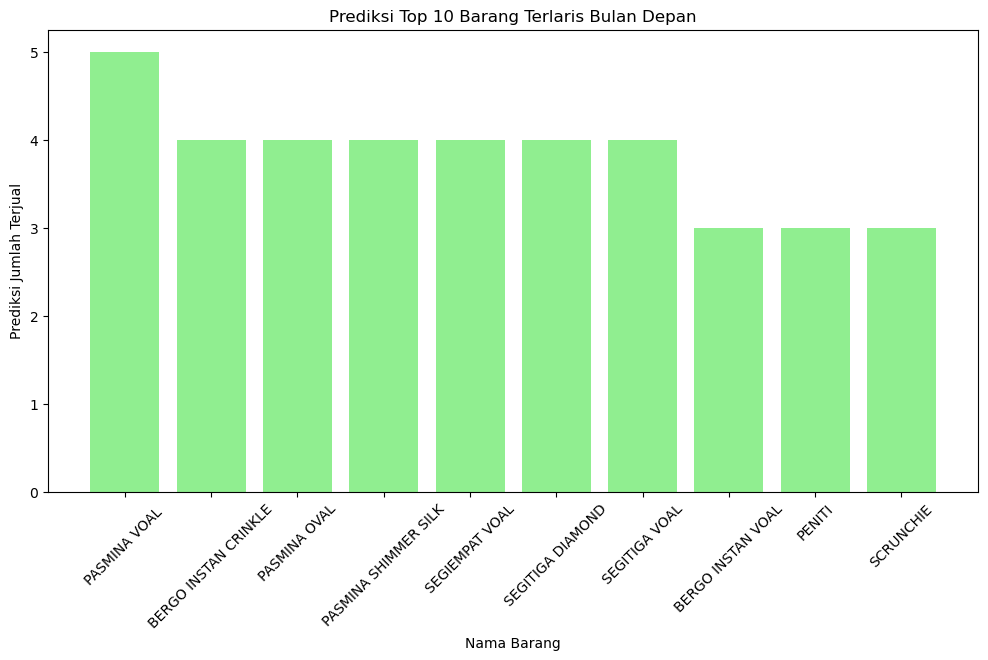

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(pred_top_items['PREDIKSI'], pred_top_items['COUNT'], color='lightgreen')
plt.xlabel('Nama Barang')
plt.ylabel('Prediksi Jumlah Terjual')
plt.title('Prediksi Top 10 Barang Terlaris Bulan Depan')
plt.xticks(rotation=45)
plt.show()